# TASK-1 IRIS FLOWER CLASSIFICATION
AUTHOR:- VISHAL KUMAR JHA


# Importing required libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

# Load Iris data and show head

In [2]:
data = pd.read_csv("Downloads/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
mapping = {"Iris-setosa":"Setosa", 
           "Iris-versicolor":"Versicolor",
           "Iris-virginica":"Virginica"}

In [4]:
data["Species"] = data["Species"].map(mapping)

# Plotting histogram for visulization of data distribution

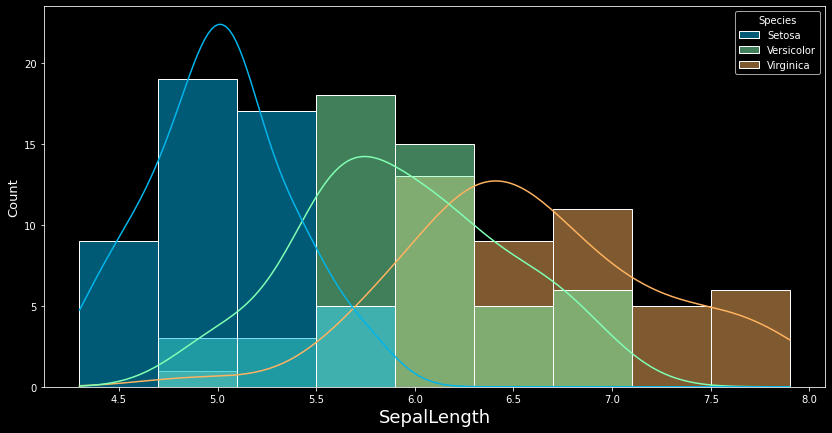

In [5]:
plt.figure(figsize=(14,7))
sns.histplot(data = data,x = data['SepalLengthCm'],hue='Species',palette='rainbow',kde=True)
plt.xlabel("SepalLength",fontsize=18)
plt.ylabel("Count",fontsize=13)
plt.show()

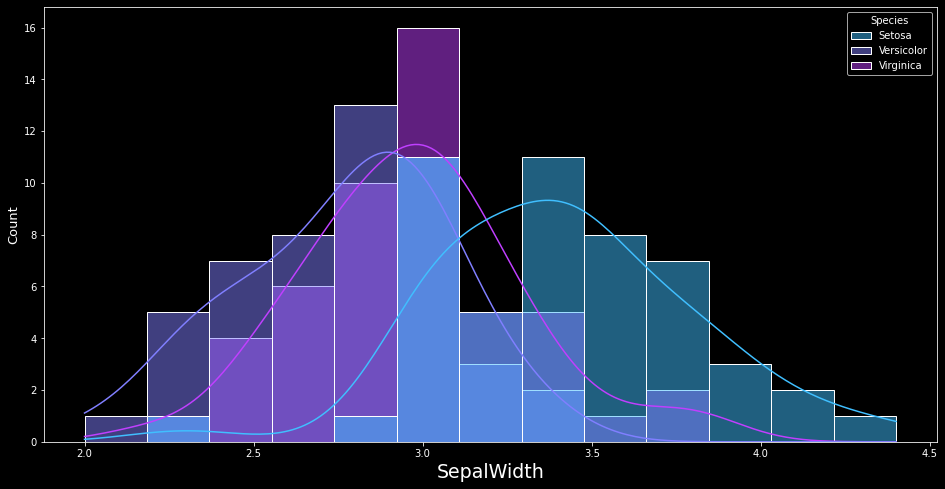

In [6]:
plt.figure(figsize=(16,8))
sns.histplot(data = data,x = data['SepalWidthCm'],hue='Species',palette='cool',kde=True)
plt.xlabel("SepalWidth",fontsize=19)
plt.ylabel("Count",fontsize=13)
plt.show()

# Scatterplot View

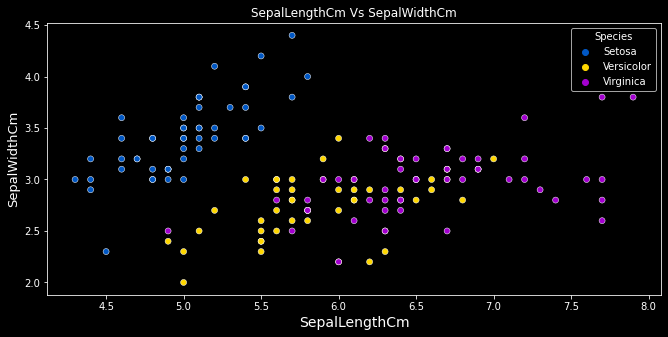

In [7]:
plt.figure(figsize=(11,5))
sns.scatterplot(data["SepalLengthCm"] ,data['SepalWidthCm'],hue=data['Species'],palette="prism")
plt.title("SepalLengthCm Vs SepalWidthCm")
plt.xlabel("SepalLengthCm",fontsize=14)
plt.ylabel("SepalWidthCm",fontsize=13)
plt.show()

# Boxplot

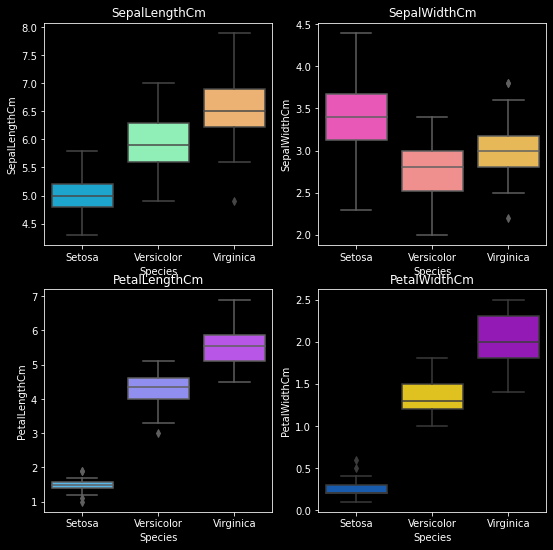

In [8]:
c = 1
colors = ["rainbow","spring","cool","prism"]
x = 0
plt.figure(figsize=(9,9))
for i in data.columns:
    if i!="Species" and i!="Id":
        plt.subplot(2,2,c)
        sns.boxplot('Species', i, data=data,palette=colors[x%4])
        plt.title(i)
        x = x+1
        c = c+1

In [9]:
Species = ['Setosa', 'Versicolor', 'Virginica']

In [10]:
data["Species"] = data["Species"].replace(['Setosa', 'Versicolor', 'Virginica'],[0,1,2])

In [11]:
X = data.drop(columns=["Id","Species"])
Y = data["Species"]

# Importing ML Libraries and Methods

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=1)

In [14]:
model = []
model.append(("LogisticRegression",LogisticRegression()))
model.append(("DecisionTreeClassifier",DecisionTreeClassifier()))
model.append(("KNeighborsClassifier",KNeighborsClassifier()))

For LogisticRegression


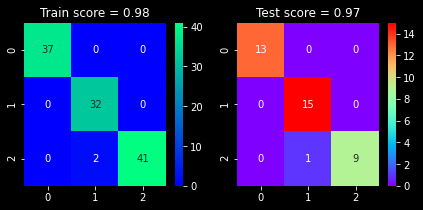

For DecisionTreeClassifier


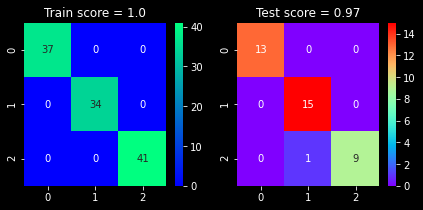

For KNeighborsClassifier


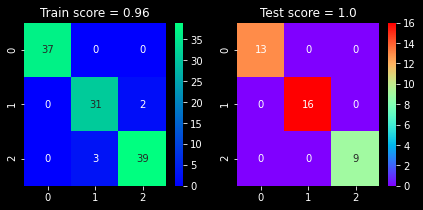

In [15]:
for i,j in model:
    j.fit(x_train,y_train)
    pred1 = j.predict(x_train)
    pred2 = j.predict(x_test)
    print(f'For {i}')
    plt.figure(figsize=(7,3))
    plt.subplot(1,2,1)
    plt.title("Train score = {}".format(round(j.score(x_train,y_train),2)))
    sns.heatmap(confusion_matrix(pred1,y_train),annot=True,cmap="winter")
    plt.subplot(1,2,2)
    plt.title("Test score = {}".format(round(j.score(x_test,y_test),2)))
    sns.heatmap(confusion_matrix(pred2,y_test),annot=True,cmap="rainbow")
    plt.show()